In [1]:

import numpy as np
import torch

import torchvision
import torchvision.transforms as T

import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats("svg")

## Import Dataset

In [2]:
# take 30min
cdata = torchvision.datasets.CIFAR10(root="cifar10",download=True)

print(cdata)

100.0%


Extracting cifar10\cifar-10-python.tar.gz to cifar10
Dataset CIFAR10
    Number of datapoints: 50000
    Root location: cifar10
    Split: Train


In [5]:
# check out the shape of the dataset
print(cdata.data.shape)

# the unique categories
print(cdata.classes)

# .targets is a list of targets converted to ints
print( len(cdata.targets))

(50000, 32, 32, 3)
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
50000


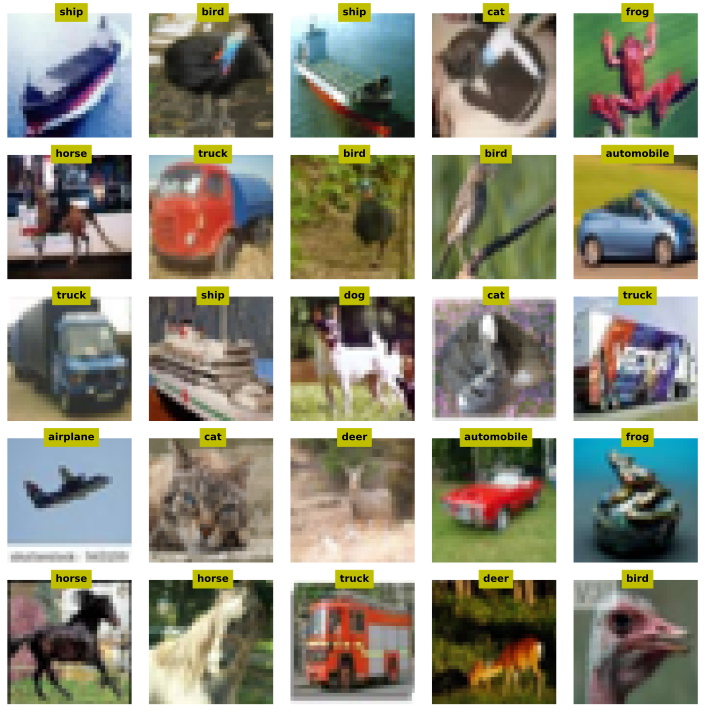

In [11]:
# inspect a few random images
fig,axs = plt.subplots(5,5,figsize=(10,10))

for ax in axs.flatten():
    
    randIdx = np.random.choice(len(cdata.targets))
    
    # extracting image
    pic = cdata.data[randIdx,:,:,:]
    # and label
    label = cdata.classes[cdata.targets[randIdx]]
    
    ax.imshow(pic)
    ax.text(16,0,label,ha="center",fontweight="bold",color='k',backgroundcolor='y')
    ax.axis('off')
    
plt.tight_layout()
plt.show()


## Apply some transformation

In [12]:
Ts = T.Compose([T.ToTensor(),T.Resize(32*4),T.Grayscale(num_output_channels=1)])

# include the transform in the dataset
cdata.transform = Ts

### can also apply the transforms immediately when loading in the data


### NOTE: Adding transform doesn't change the image data
### they are applied only when they need to be
print(cdata.data[123,:,:,:].shape)

(32, 32, 3)


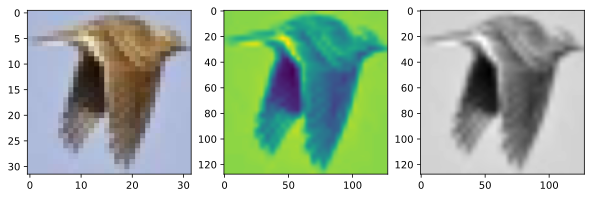

In [14]:
# apply the transform

# opt 1a: apply the transform "externally" to an image
img1 = Ts(cdata.data[123,:,:,:])

# opt 1b: use the embedded transform
img2 = cdata.transform(cdata.data[123,:,:,:])

fig,ax = plt.subplots(1,3,figsize=(10,3))
ax[0].imshow(cdata.data[123,:,:,:])
ax[1].imshow(torch.squeeze(img1))
ax[2].imshow(torch.squeeze(img2),cmap="gray")

plt.show()

In [16]:
# NOTE : ToTensor and normalization
??T.ToTensor() 

Object `T.ToTensor()` not found.
